In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

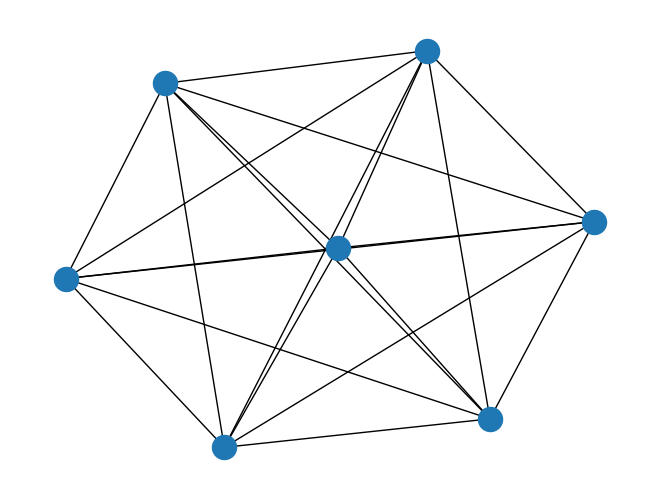

In [2]:
G = nx.graph_atlas(1252) #Recordar 200 es el grafo que estudiamos el sábado
nx.draw(G,)

In [3]:
import random
# Check if the graph has a weight attribute for edges
#RECORDAR QUE TIENEN QUE SER RANDOM DESPUÉS
for u, v in G.edges:
    G[u][v]['weight'] = 1

# Print the edges with weights
for u, v, data in G.edges(data=True):
    print(f"Edge {u}-{v} has weight {data['weight']}")

Edge 0-1 has weight 1
Edge 0-2 has weight 1
Edge 0-3 has weight 1
Edge 0-4 has weight 1
Edge 0-5 has weight 1
Edge 0-6 has weight 1
Edge 1-2 has weight 1
Edge 1-3 has weight 1
Edge 1-4 has weight 1
Edge 1-5 has weight 1
Edge 1-6 has weight 1
Edge 2-3 has weight 1
Edge 2-4 has weight 1
Edge 2-5 has weight 1
Edge 2-6 has weight 1
Edge 3-4 has weight 1
Edge 3-5 has weight 1
Edge 3-6 has weight 1
Edge 4-5 has weight 1
Edge 4-6 has weight 1
Edge 5-6 has weight 1


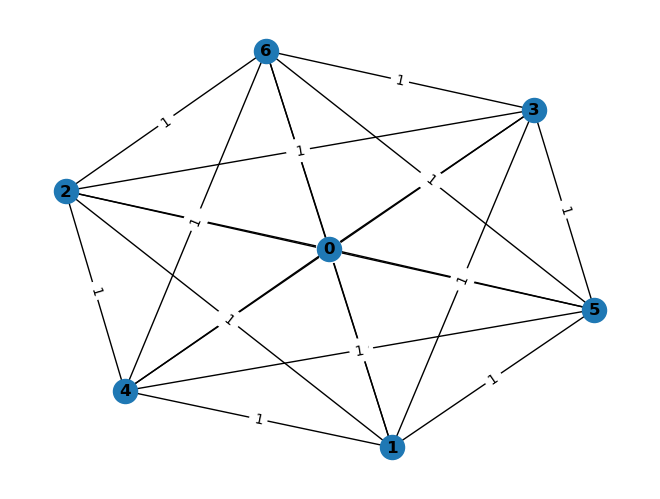

In [4]:
# Draw the graph
pos = nx.spring_layout(G)  # You can choose a different layout if needed
nx.draw(G, pos, with_labels=True, font_weight='bold')

# Draw edge labels
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

[0, 4, 0, 2, 4, 3, 5, 3, 2, 1, 0, 1, 4, 5, 4, 1, 3, 0]

[(0, 4), (0, 2), (3, 5), (2, 3), (0, 1), (1, 4), (4, 5), (1, 3), x(1, 2)x, x(2, 4)x, (0, 3), x(3, 4)x, 0]

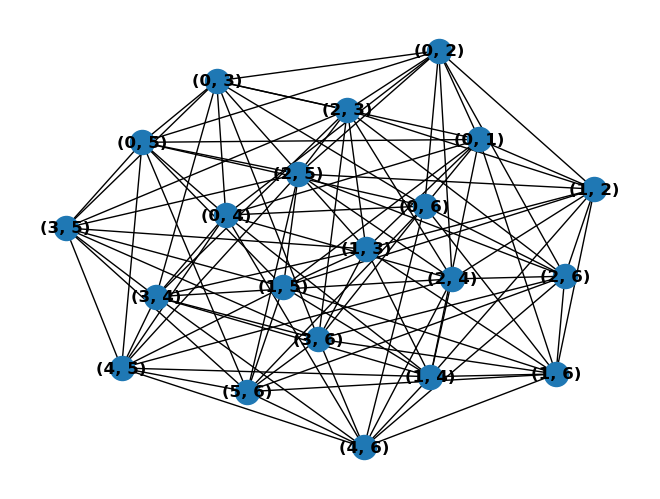

In [5]:
# Generate the line graph
L = nx.line_graph(G)

for u, v in L.edges:
    L[u][v]['weight'] = 1

for u, v in L.edges:
    L[u][v]['shortest_path'] = None
    
# Draw the line graph
pos = nx.spring_layout(L)  # You can choose a different layout if needed
nx.draw(L, pos, with_labels=True, font_weight='bold')

# Draw edge labels
#edge_labels = {(u, v): L[u][v]['weight'] for u, v in L.edges}
#nx.draw_networkx_edge_labels(L, pos, edge_labels=edge_labels)

plt.show()

In [7]:
import copy

l = list(L.nodes())
path_ejemplo = random.sample(l,len(l))
print(path_ejemplo)

def vecino(path):  #Dado un tour que pase por todos los vertices en L(G) se obtiene un vecino de este:
    N=len(path)-1
    a = np.random.randint(0,N)
    while True:
        b = np.random.randint(1,N)
        if b != a:
            if a==0:
                if path[b][0]==0 or path[b][1]==0:
                    break
            else:
                break
    q = copy.deepcopy(path)
    c = q[a]
    q[a] = q[b]
    q[b] = c
    return q

print(vecino(path_ejemplo))


[(0, 2), (1, 5), (3, 6), (1, 4), (4, 6), (0, 3), (2, 6), (1, 3), (5, 6), (2, 3), (3, 5), (0, 5), (1, 6), (1, 2), (3, 4), (0, 6), (4, 5), (2, 5), (0, 4), (0, 1), (2, 4)]
[(0, 2), (1, 5), (3, 6), (1, 4), (4, 6), (0, 3), (2, 6), (1, 3), (5, 6), (2, 3), (0, 1), (0, 5), (1, 6), (1, 2), (3, 4), (0, 6), (4, 5), (2, 5), (0, 4), (3, 5), (2, 4)]


In [8]:
path_ejemplo.append(0)
print(len(path_ejemplo))

22


In [9]:
print(path_ejemplo)

[(0, 2), (1, 5), (3, 6), (1, 4), (4, 6), (0, 3), (2, 6), (1, 3), (5, 6), (2, 3), (3, 5), (0, 5), (1, 6), (1, 2), (3, 4), (0, 6), (4, 5), (2, 5), (0, 4), (0, 1), (2, 4), 0]


1) Dada una configuración de orden de aristas, tal que la primera arista siempre incluye al cero, donde la última es igual a la primera, tomar un vecino. La arista inicial puede cambiar solo con aristas que incluyan al cero, y en este caso, se cambiaría la última arista del arreglo por la que se permuta. La permutación entre aristas intermedias son sin restricciones.

2) Reconstruir tour en grafo original: 

2.1) Tomar la primera arista, e ir del cero a vértice v. Cambiar nodo actual a v.

2.2) Verificar si v es un vértice de la siguiente arista. Si está, tomar esa arista. Si no, ver si el 0 está en la arista, en el caso de estar, volver al cero y tomar la arista 2. En el caso de no estar, si e=uw es la arista, calcular el camino mínimo de v a u y de v a w, tomar el mínimo entre estos, tomaremos ese camino, digamos sin perdida de generalidad a u, y eliminaremos todas las aristas ocupadas durante el vu-camino seleccionado que estén en el conjunto original (para no pasar por ellas nuevamente). La última arista no es posible borrarla.

2.3) Iterar hasta llegar a la penúltima arista del conjunto. recorrerla y tomar el camino mínimo hasta el cero.

3) Con este tour, calculamos su peso y su respectiva temperatura para construir la CdM.

In [10]:
def Back2GraphPath(path,grafo):   #Toma tour del grafo de lineas y lo pasa a tour en el grafo original

    path_copia = copy.deepcopy(path)
    graphPath = [0]

    aristaActual = path_copia[0]    
    i = 0
    graphPath.append(path_copia[0][1]) #de la forma (0,v)

    matrizCaminos = create_matrix(grafo)
    
    while path_copia[i+1] != 0:

        nodoactual = graphPath[-1]
        nodoAnterior = graphPath[-2]
        siguienteArista = path_copia[i+1]


        aristaSet = set(siguienteArista)
        #caso 1

        if nodoactual in aristaSet:      #nodoactual está en la siguiente arista 
            nodoactual = next(iter(aristaSet.difference({nodoactual})))
            graphPath.append(nodoactual)

        elif nodoactual not in aristaSet:
            if nodoAnterior in aristaSet:   #Caso (0,v)(0,w) -> 0,v,0,w
                graphPath.append(nodoAnterior)
                graphPath.append(next(iter(aristaSet.difference({nodoAnterior}))))
            else:  #caso camino mínimo
                nodo1, nodo2 = siguienteArista[0], siguienteArista[1]
                if matrizCaminos[nodoactual,nodo1][1] <= matrizCaminos[nodoactual,nodo2][1]:
                    vertices = matrizCaminos[nodoactual,nodo1][0]
                    graphPath = graphPath + vertices[1:]
                    graphPath.append(nodo2)
                else:
                    vertices = matrizCaminos[nodoactual,nodo2][0]
                    graphPath = graphPath + vertices[1:]
                    graphPath.append(nodo1)
                for j in range(len(vertices)-1):
                    edge = (min(vertices[j],vertices[j+1]),max(vertices[j],vertices[j+1]))
                    if edge in path_copia[i+1:]:
                        path_copia.remove(edge)
                        
        #borrar
        i += 1
        aristaActual = siguienteArista
    
   
    nodoactual = graphPath[-1]
    if nodoactual == 0:
        pass
    elif grafo.has_edge(nodoactual,0):
        graphPath.append(0)
    else:
        vertices = matrizCaminos[nodoactual,0][0]
        graphPath = graphPath + vertices[1:]

    return graphPath

In [11]:
import networkx as nx
import numpy as np

def create_matrix(graph):
    num_nodes = len(graph.nodes())
    
    # Define dtype for the structured array
    dtype = [('path', object), ('weight', float)]
    
    # Initialize matrix with dtype
    matrix = np.zeros((num_nodes, num_nodes), dtype=dtype)

    for i, start_node in enumerate(graph.nodes()):
        for j, end_node in enumerate(graph.nodes()):
            if i == j:
                continue  # Skip diagonal elements

            try:
                # Try to find the shortest path and its weight
                path = nx.shortest_path(graph, source=start_node, target=end_node, weight='weight')
                weight = nx.shortest_path_length(graph, source=start_node, target=end_node, weight='weight')
                # Assign values to the structured array
                matrix[i, j] = (path, weight)
            except nx.NetworkXNoPath:
                # If no path exists, set path and weight to None
                matrix[i, j] = (None, None)

    return matrix

# Example usage:
# Create an example graph
G1 = nx.Graph()
G1.add_edge('A', 'B', weight=2)
G1.add_edge('A', 'C', weight=4)
G1.add_edge('B', 'C', weight=1)
G1.add_edge('B', 'D', weight=7)

result_matrix = create_matrix(G1)
print(result_matrix)



[[(0, 0.) (list(['A', 'B']), 2.) (list(['A', 'B', 'C']), 3.)
  (list(['A', 'B', 'D']), 9.)]
 [(list(['B', 'A']), 2.) (0, 0.) (list(['B', 'C']), 1.)
  (list(['B', 'D']), 7.)]
 [(list(['C', 'B', 'A']), 3.) (list(['C', 'B']), 1.) (0, 0.)
  (list(['C', 'B', 'D']), 8.)]
 [(list(['D', 'B', 'A']), 9.) (list(['D', 'B']), 7.)
  (list(['D', 'B', 'C']), 8.) (0, 0.)]]


In [37]:
A = [(1, 2), (2, 3), (3, 4)]
B = [(5, 6), (6, 7), (7, 8)]

paths = [A]
paths.append(B)

print(paths)


[[(1, 2), (2, 3), (3, 4)], [(5, 6), (6, 7), (7, 8)]]


In [42]:
# funcion que calcula el costo de un estado
def fn_costos(D,p,G): #recibe matriz D de costos (proveniente de create_matrix), grafo y secuencia de aristas p
    caminoG = Back2GraphPath(p,G)
    N=len(caminoG)
    return sum([D[caminoG[i], caminoG[i+1]][1] for i in range(N-1)])

# funcion que simula una cadena con I pasos, dada una funcion func_beta, estado inicial per_incial,
# coordenadas del conjunto de ciudades C, y matriz de distancias entre ciudades D.
# entrega arrays con la permutacion y costo en cada paso
def CM(I, func_beta, path_inicial, G, D):
    path = path_inicial
    paths  = [path]
    costos = np.asarray(fn_costos(D,path,G))
    u = np.random.uniform(size=I)
    for n in range(I):
        beta = func_beta(n)
        new_path = vecino(path)
        new_cost = fn_costos(D,new_path,G)
        cte = min(1.0, np.exp(-beta * (new_cost - fn_costos(D,path,G))))
        if u[n] <= cte:
            path = new_path
        
        paths.append(path)
        costos = np.append(costos, fn_costos(D,path,G))

    return paths, costos

In [15]:
#funciones beta por comparar
def beta_lin(n,c):
    return n/c
def beta_log(n,c):
    return (1/c)*np.log(1+n)
def beta_cuad(n):
    return n**(2)
def beta_exp(n):
    return 3**n

# beta lineal con c=100
def f1(n, c=1):
    return beta_lin(n,c)
# beta lineal con c fijo como la cota para oscilacion calculada anteriormente
def f2(n, c=4*np.sqrt(2)):
    return beta_lin(n,c)
# beta logaritmico con c fijo como la cota para oscilacion calculada anteriormente
def f3(n, c=4*np.sqrt(2)):
    return beta_log(n,c)

[(0, 2), (1, 5), (3, 6), (1, 4), (4, 6), (0, 3), (2, 6), (1, 3), (5, 6), (2, 3), (3, 5), (0, 5), (1, 6), (1, 2), (3, 4), (0, 6), (4, 5), (2, 5), (0, 4), (0, 1), (2, 4), 0] 22


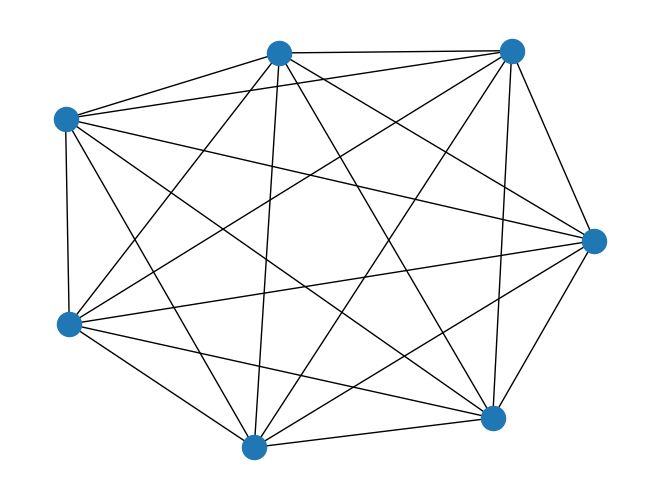

In [16]:
# parametros fijos del modelo
D = create_matrix(G)
path_inicial = path_ejemplo
print(path_inicial, len(path_inicial))
opts=[]
nx.draw(G,)

[[(0, 2), (1, 5), (3, 6), (1, 4), (4, 6), (0, 3), (2, 6), (1, 3), (5, 6), (2, 3), (3, 5), (0, 5), (1, 6), (1, 2), (3, 4), (0, 6), (4, 5), (2, 5), (0, 4), (0, 1), (2, 4), 0]]


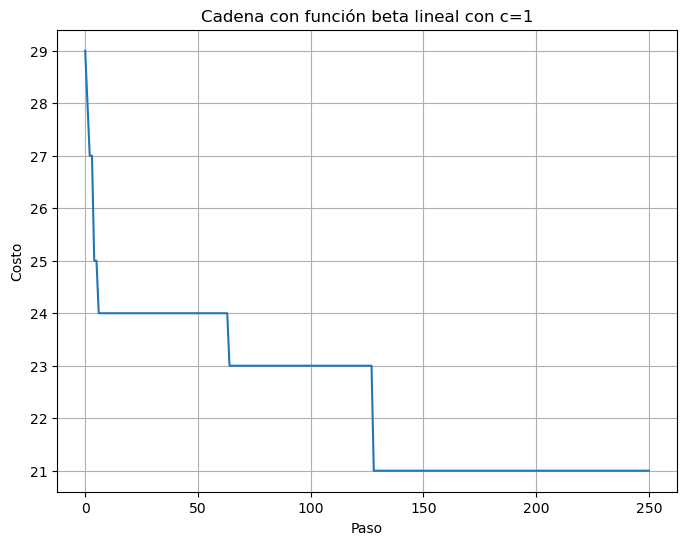

[(0, 5), (1, 6), (3, 6), (1, 4), (5, 6), (1, 3), (0, 1), (4, 5), (1, 2), (2, 4), (1, 5), (0, 4), (0, 2), (3, 5), (2, 3), (2, 6), (4, 6), (3, 4), (0, 3), (2, 5), (0, 6), 0]
El óptimo obtenido es de 21.0


In [39]:
#funcion beta lineal con constante 1
I=250
paths, costos = CM(I, f1, path_inicial, G, D)
plt.figure(figsize=(8, 6))
plt.plot(costos)
plt.grid()
plt.title('Cadena con función beta lineal con c=1')
plt.ylabel('Costo')
plt.xlabel('Paso')
plt.show()

opt=min(costos)
opt_path = paths[-1]
print(opt_path)
print('El óptimo obtenido es de {}'.format(round(opt,2)))

In [2]:
#camino = Back2GraphPath(opt_path,G)
#print(camino)

G = nx.graph_atlas(1252) #Recordar 200 es el grafo que estudiamos el sábado
nx.draw(G,)
import random
# Check if the graph has a weight attribute for edges
#RECORDAR QUE TIENEN QUE SER RANDOM DESPUÉS
for u, v in G.edges:
    G[u][v]['weight'] = 1

# Print the edges with weights
for u, v, data in G.edges(data=True):
    print(f"Edge {u}-{v} has weight {data['weight']}")
camino = [0, 5, 1, 6, 3, 1, 4, 5, 6, 0, 1, 2, 4, 0, 2, 3, 5, 2, 6, 4, 3, 0]

Edge 0-1 has weight 1
Edge 0-2 has weight 1
Edge 0-3 has weight 1
Edge 0-4 has weight 1
Edge 0-5 has weight 1
Edge 0-6 has weight 1
Edge 1-2 has weight 1
Edge 1-3 has weight 1
Edge 1-4 has weight 1
Edge 1-5 has weight 1
Edge 1-6 has weight 1
Edge 2-3 has weight 1
Edge 2-4 has weight 1
Edge 2-5 has weight 1
Edge 2-6 has weight 1
Edge 3-4 has weight 1
Edge 3-5 has weight 1
Edge 3-6 has weight 1
Edge 4-5 has weight 1
Edge 4-6 has weight 1
Edge 5-6 has weight 1


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.animation as animation
import matplotlib
import tkinter as tk

matplotlib.use('TkAgg')

# Example complete graph with 7 nodes
H = nx.complete_graph(7)
pos = nx.spring_layout(H, iterations=200)

# Here goes your path as a list of nodes
path = camino

def draw_next_status(n):
    plt.cla()
    
    # Create a new graph for each frame
    G = nx.Graph()
    
    # Add nodes
    G.add_nodes_from(H.nodes())
    
    # Counter to track how many times each node has been reached
    node_count = {node: 0 for node in H.nodes()}
    
    # Add edges up to the current node in the path
    for i in range(n + 1):
        edge_start, edge_end = path[i], path[i + 1] if i + 1 < len(path) else path[0]
        
        # Update the counter for each node in the current edge
        node_count[edge_start] += 1
        
        # Draw the red edge
        G.add_edge(edge_start, edge_end, color='red')
    
    # Draw the graph with red edges and colored nodes in the current frame
    edge_colors = ['red' for _ in G.edges()]
    node_colors = [f'C{node_count[node]}' for node in G.nodes()]
    
    nx.draw(G, pos, node_color=node_colors, node_size=700, with_labels=True, edge_color=edge_colors, width=2)

ani = animation.FuncAnimation(plt.gcf(), draw_next_status, interval=1000, frames=len(path) - 1, repeat=False)

writer = animation.PillowWriter(fps=1,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('scatter.gif', writer=writer)

plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e221381d-01df-45f6-8787-6c2b66a42e5e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>